In [0]:
from datetime import *
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.dates as mdates


In [0]:
# from demo import *   # if writing in a py file

The below cell contains the following classes:
* **countryWise** - Returns a dataframe of India/US containing Confirmed, Recovered, Deaths data over the time range

In [0]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import re
import requests 
import numpy as np

'''returns covid-19 case(active/recovered/death) data for India/USA.
Use it as:
obj = countryWise()
print(obj.getUSdata()) --> To get India's Data
print(obj.getIndiaData()) --> To get USA's Data
'''
class countryWise:
    def getIndiaData(self):
        worlddf = pd.read_csv("owid-covid-data.csv")
        indiadata = worlddf[worlddf.location == "India"]
        uselessattributesinIndia = ["iso_code","location","total_cases_per_million", "new_cases_per_million", 
        "total_deaths_per_million", "new_deaths_per_million", "new_tests", "total_tests_per_thousand", 
        "new_tests_per_thousand", "tests_units"]
        indiadata.drop(uselessattributesinIndia,axis=1,inplace=True)
        indiadata.replace(r'^\s+$', np.nan, regex=True)
        columnnames = indiadata.columns
        for col in columnnames:
            indiadata[col].fillna("0",inplace=True)
        return indiadata
    def getUSdata(self):
        worlddf = pd.read_csv("owid-covid-data.csv")
        USdata = worlddf[worlddf.location == "United States"]
        uselessattributesinUS = ["iso_code","location","total_cases_per_million", "new_cases_per_million", 
        "total_deaths_per_million", "new_deaths_per_million", "new_tests", "total_tests_per_thousand", 
        "new_tests_per_thousand", "tests_units"]
        USdata.drop(uselessattributesinUS,axis=1,inplace=True)
        USdata.replace(r'^\s+$', np.nan, regex=True)
        columnnames = USdata.columns
        for col in columnnames:
            USdata[col].fillna("0",inplace=True)
        return USdata


'''Returns data of hospital beds for hospitals in a district
Use as:
# temp = beds()
# print(temp.readData())
'''
class beds:
    def readData(self):
        mainlist = list()
        fileo = open("beds.json")
        data = json.load(fileo)
        fileo.close()
        all_states = data["data"]["regional"]
        for i in range(0,len(all_states)):
            state = data["data"]["regional"][i]["state"]
            ruralHospitals = data["data"]["regional"][i]["ruralHospitals"]
            ruralBeds = data["data"]["regional"][i]["ruralBeds"]
            urbanHospitals = data["data"]["regional"][i]["urbanHospitals"]
            urbanBeds = data["data"]["regional"][i]["urbanBeds"]
            totalHospitals = data["data"]["regional"][i]["totalHospitals"]
            totalBeds = data["data"]["regional"][i]["totalBeds"]
            temp = list()
            temp.append(state)
            temp.append(ruralHospitals)
            temp.append(ruralBeds)
            temp.append(urbanHospitals)
            temp.append(urbanBeds)
            temp.append(totalHospitals)
            temp.append(totalBeds)
            mainlist.append(temp)
        keylist = ["state","ruralHospitals","ruralBeds","urbanHospitals","urbanBeds","totalHospitals","totalBeds"]
        df = pd.DataFrame(mainlist,columns = keylist)
        df.replace(r'^\s+$', np.nan, regex=True)
        columnnames = df.columns
        for col in columnnames:
            df[col].fillna("0",inplace=True)
        return df

'''Returns data about admission capacity and hospital beds
Use as:
# temp = medicalColleges()
# print(temp.readData())
'''
class medicalColleges:
    def readData(self):
        mainlist = list()
        fileo = open("medical-colleges.json")
        data = json.load(fileo)
        fileo.close()
        all_states = data["data"]["medicalColleges"]
        for i in range(0,len(all_states)):
            state = data["data"]["medicalColleges"][i]["state"]
            name = data["data"]["medicalColleges"][i]["name"]
            city = data["data"]["medicalColleges"][i]["city"]
            ownership = data["data"]["medicalColleges"][i]["ownership"]
            admissionCapacity = data["data"]["medicalColleges"][i]["admissionCapacity"]
            hospitalBeds = data["data"]["medicalColleges"][i]["hospitalBeds"]
            temp = list()
            temp.append(state)
            temp.append(name)
            temp.append(city)
            temp.append(ownership)
            temp.append(admissionCapacity)
            temp.append(hospitalBeds)
            mainlist.append(temp)
        keylist = ["state","name","city","ownership","admissionCapacity","hospitalBeds"]
        df = pd.DataFrame(mainlist,columns = keylist)
        df.replace(r'^\s+$', np.nan, regex=True)
        columnnames = df.columns
        for col in columnnames:
            df[col].fillna("0",inplace=True)
        statelist = list(df['state'].unique())
        tempdict = dict()
        for i in range(0,len(statelist)):
            tempdict[statelist[i]] = 0
        for ind in df.index:
            state = df['state'][ind]
            hospitalBeds = int(df['hospitalBeds'][ind])
            tempdict[state] = tempdict[state]+hospitalBeds
        mainlist = []
        for i in tempdict.keys():
            state = i
            medbeds = tempdict[i]
            tlist = list()
            tlist.append(state)
            tlist.append(medbeds)
            mainlist.append(tlist)
        keys = ["state","medicalCollegeBeds"]
        df = pd.DataFrame(mainlist,columns = keys)
        df.replace(r'^\s+$', np.nan, regex=True)
        columnnames = df.columns
        for col in columnnames:
            df[col].fillna("0",inplace=True)
        return df
        
'''Returns covid-19 case(active/recovered/death) data for different states in India.
Use as:
# temp = mohfw()
# #Note that this returns a dictionary
# statedict = temp.readData()
# print(statedict["Maharashtra"])
'''
class mohfw:
    def readData(self):
        mainlist = list()
        fileo = open("covid19/data/mohfw.json")
        data = json.load(fileo)
        fileo.close()
        statedf = pd.read_csv("states.csv")
        states = dict()
        for ind in statedf.index:
            abbr = statedf['A'][ind]
            stat = statedf['B'][ind]
            states[abbr] = stat
        for i in range(0,data["total_rows"]):
            temp = data["rows"][i]["id"].split("T")
            date = temp[0]
            state = data["rows"][i]["value"]["state"]
            state = states[state]
            cured = data["rows"][i]["value"]["cured"]
            death = data["rows"][i]["value"]["death"]
            confirmed = data["rows"][i]["value"]["confirmed"]
            temp = list()
            temp.append(date)
            temp.append(state)
            temp.append(cured)
            temp.append(death)
            temp.append(confirmed)
            mainlist.append(temp)
        keylist = ["date","state","cured","death","confirmed"]
        df = pd.DataFrame(mainlist,columns = keylist)
        df.replace(r'^\s+$', np.nan, regex=True)
        columnnames = df.columns
        for col in columnnames:
            df[col].fillna("0",inplace=True)
        maindict = {}
        statelist = list(df['state'].unique())
        statetoindex = {}
        index = 0
        for i in statelist:
            statetoindex[i] = index
            index = index + 1
        layer3list = list()
        for i in range(0,index):
            templist = list()
            layer3list.append(templist)
        for ind in df.index:
            date = df['date'][ind]
            state = df['state'][ind]
            cured = df['cured'][ind]
            death = df['death'][ind]
            confirmed = df['confirmed'][ind]
            layer1list = list()
            layer1list.append(date)
            layer1list.append(state)
            layer1list.append(cured)
            layer1list.append(death)
            layer1list.append(confirmed)
            stateindex = statetoindex[state]
            layer3list[stateindex].append(layer1list)
        for i in statetoindex.keys():
            statename = i
            index = statetoindex[statename]
            keylist = ["date","state","cured","death","confirmed"]
            df = pd.DataFrame(layer3list[index],columns = keylist)
            maindict[statename] = df
            df.drop_duplicates(subset ="date", 
                     keep = "first", inplace = True)
        return maindict


class h1n1:
    def readData(self):
        df = pd.read_csv("h1n1.csv")
        return df

''' Returns district wise data for India
Use as:
# temp = rawjson()
# print(temp.readData())
'''
class rawjson:
    def readData(self):
        hugedataset = open("raw_data.json")
        dataset = json.load(hugedataset)
        hugedataset.close()
        keylist = list(dataset["raw_data"][0].keys())
        listoflist = []
        for i in range(len(dataset["raw_data"])):
            templist = list()
            for j in keylist:
                templist.append(dataset["raw_data"][i][j])
            listoflist.append(templist)
        df = pd.DataFrame(listoflist,columns = keylist)
        total = len(dataset["raw_data"])
        usefulattributes = []
        for i in range(len(keylist)):
            temp = (len(df[df[keylist[i]] == ''])*100)/total
            if temp<30:
                usefulattributes.append(keylist[i])
        uselessattributes = []
        for i in keylist:
            if i not in usefulattributes:
                uselessattributes.append(i)
        uselessattributes.append("notes")
        usefulattributes.remove("notes")
        df.drop(uselessattributes,axis=1,inplace=True)
        removelist = []
        for ind in df.index:
            if df['detecteddistrict'][ind]=='' or df['detectedstate'][ind]=='':
                removelist.append(ind)
        df.drop(df.index[removelist],inplace=True)
        print(len(df))
        df.replace(r'^\s+$', np.nan, regex=True)
        columnnames = df.columns
        for col in columnnames:
            df[col].fillna("0",inplace=True)
        return df

'''Returns case data for a country passed as parameter
Use as:
# temp = timeseries()
# print(temp.readData("India"))
'''
class timeseries:
    def readData(self,countryname):
        hugedataset = open("timeseries.json")
        dataset = json.load(hugedataset)
        hugedataset.close()
        mainlist = list()
        data = dataset[countryname]
        for i in range(0,len(data)):
            date = data[i]['date']
            confirmed = data[i]['confirmed']
            deaths = data[i]['deaths']
            recovered = data[i]['recovered']
            templist = list()
            templist.append(date)
            templist.append(confirmed)
            templist.append(deaths)
            templist.append(recovered)
            mainlist.append(templist)
        keys = ["date","confirmed","deaths","recovered"]
        df = pd.DataFrame(mainlist,columns = keys)
        df.replace(r'^\s+$', np.nan, regex=True)
        columnnames = df.columns
        for col in columnnames:
            df[col].fillna("0",inplace=True)
        return df
        

## Parameters (Beta & Gamma) Estimation for SIR Modeling
### Whole India Covid Scenarios during 
##### 1. Pre-Lockdown 
##### 2. Lockdown

Class **model** is our SIR model which tries to fit the time_series data.
* It uses Limited-memory BFGS (L-BFGS or LM-BFGS) optimization algorithm.
* And MSE loss function to calculate the optimal value of the hyper-parameters **$\beta$ , $\gamma$ and $R_0$.**
* **model** class has also been extended to simulate the future growth/decay of the pandemic, given the current values.
* It plot's the SIR model graph with the below variables:
    * Actual Infected
    * Actual Recovered
    * Susceptible
    * Predicted Infected.
    * Predicted Recovered.

In [0]:
class model:
    def __init__(self, flag = False, pres_fut = None):
        self.flag = flag
        self.pres_fut = pres_fut
        return
    
#     def extend_index(self, index, new_size):
#         print(" Index.shape = {} ,,, type(Index) = {}".format(index.shape,type(index)))
#         print(index[-1],type(index[-1]))
#         values = index.values
#         current = index[-1]
# #         current = datetime.strptime(index[-1], '%m/%d/%y')

#         while len(values) < new_size:
#             current = current + timedelta(days=1)
#             values = np.append(values, current)

# #             values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
#         return values
        
    def loss(self,point, data, recovered, s_0, i_0, r_0):
        size = len(data)
        beta, gamma = point
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
        solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
        l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
        l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
        alpha = 0.1
        return alpha * l1 + (1 - alpha) * l2
    
    def predict(self,beta, gamma, data, recovered, s_0, i_0, r_0):
        if self.flag == False :
            new_index = list(data.index.values)
        else :
            new_index = self.pres_fut
#         print(new_index)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self,recovered, infected, data , s_0, i_0, r_0 , title = "India"):
#         recovered = recovered
#         infected = infected
#         data = data
        optimal = minimize(self.loss, [0.001, 0.001],
                           args=(data, recovered, s_0, i_0, r_0),
                           method='L-BFGS-B',
                           bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
#         print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, prediction = self.predict(beta,
                                                                                  gamma,
                                                                                  data,
                                                                                  recovered,
                                                                                  s_0, i_0, r_0)
        df = pd.DataFrame({'Actual Infected': extended_actual,
                           'Actual Recovered': extended_recovered,
                           'Susceptible': prediction.y[0],
                           'Predicted Infected': prediction.y[1],
                           'Predicted Recovered': prediction.y[2]},
                          index = new_index )
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(title,fontsize = 20)
        df.plot(ax=ax)
        plt.ylabel("Number of cases",fontsize = 16)
        plt.xlabel("Date",fontsize = 16)

        print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        f_name = datetime.now().strftime("%Y-%m-%d-%H-%M-%S") + '.png'
        fig.savefig(title+'.png')
#         fig.savefig(f"India_" + f_name)        

##### Assumptions for S_0 (Initial Susceptible Population for India) during:
Since Europe is currently recovering as cases have started to gone down and the same in the Asian countries, I expect 0.25 to go upto 0.30 at max. based on the and Asia upto 0.08, because of the no. of cases each of them have been reporting.

Based on the above assumptions here's the Indian population that might get affected:

Max: 0.003*135 Crore; 0.3% = 0.003
Min: 0.0008*135 Crore; 0.08% = 0.0008
"Please note that Europe & USA are the countries contributing maximum to the total no. of cases globally so I have tried to keep the figures on the higher side"

The maximum value range turns out to be 4.05 million which turns out to be pretty much unrealistic right now based on the current stage that we are in, hence I'll go ahead with the manipulation on the minimum value first, so base value that we have is 8% of 135 crore, i.e. 1.08 million. The population of India is ~200 per sq. km. while that of Europe is ~143 per sq. km. Now, considering multiple factors like, the early declaration of lockdown, no. of people tested positive percentage being low as compared to other countries, the mean age group in India being much lesser than that of Europe. I assume that only 50% of the current population size can actually get affected, i.e. to 0.54 million. A last few factors which I considered in the back of my mind which might be debatable are like: corona virus started off with people having travel history and then gradually spreading through community transmission. India is a country where many parts are still under developed, people in those places don't have the priviledge to go anywhere outside their place and neither do anyone from outside visit their places as there is no industrial benefits available. There are no airports, no movie theatres, shopping malls or party halls where mass gathering can happen. Also, since the mean age of the population of India is lesser compared to Europe & USA as well as the climate being more hot and humid which makes difficult for the corona virus to transmit easily I assume that Indians have a stronger immuntiy as a mass and are more prone to diseases like these earlier. Also as per the Indian Govt. almost 30% of the existing cases have generated from the religious event that happened in Delhi post lockdown and except that there has been no record of community transmission happening anywhere else in India.

Based on the above considerations and the existing current trend in the number of cases I select my population that could have actually come in contact with corona:

i) Best case scenario: 75000

ii) Worst case scenario: 1,50,000

The above figures correspond to the population till 25th March. I assume the exposed population does not increase with time because of the existing lockdown that started on 25th March.

Note: The assumptions are based on my intuitions and it may or may not be correct. However, the population can change drastically based on the rate of testing currently persisting

* Pre-Lockdown Period Population = 30,000 (1st Mar - 24th Mar)
* During Lockdown Period Population = [75,000 - 1,50,000] (25th Mar - 2nd May)

In [0]:
ts = timeseries()
ts_india = ts.readData("India")
ts_india['date'] =  pd.to_datetime(ts_india['date'], infer_datetime_format=True)
ts_india['active'] =  ts_india['confirmed'] - (ts_india['deaths'] + ts_india['recovered'])

## PRE - LOCKDOWN

In [0]:
ts_india_pre_ld = ts_india[(ts_india['date']<'2020-3-25')].reset_index(drop=True)

In [0]:

data_pre_ld = ts_india_pre_ld.set_index('date')['active']
infected_pre_ld = ts_india_pre_ld.set_index('date')['confirmed']
recovered_pre_ld = ts_india_pre_ld.set_index('date')['recovered']
# removed_pre_ld = ts_india_pre_ld['recovered'] + ts_india_pre_ld['deaths'] 
s_0_pre_ld = 3000
i_0_pre_ld = 2
r_0_pre_ld = 3

In [0]:
pandas_tslib1 = data_pre_ld.index[-1].to_pydatetime() + timedelta(days=1)
pandas_tslib1 = pandas_tslib1.strftime('%Y-%m-%d')
pre_pres_fut = np.array(list(data_pre_ld.index.values)+ list((np.array(pd.date_range(pandas_tslib1, periods=180)))))

country=India, beta=0.08960874, gamma=0.00502919, r_0:17.81774270


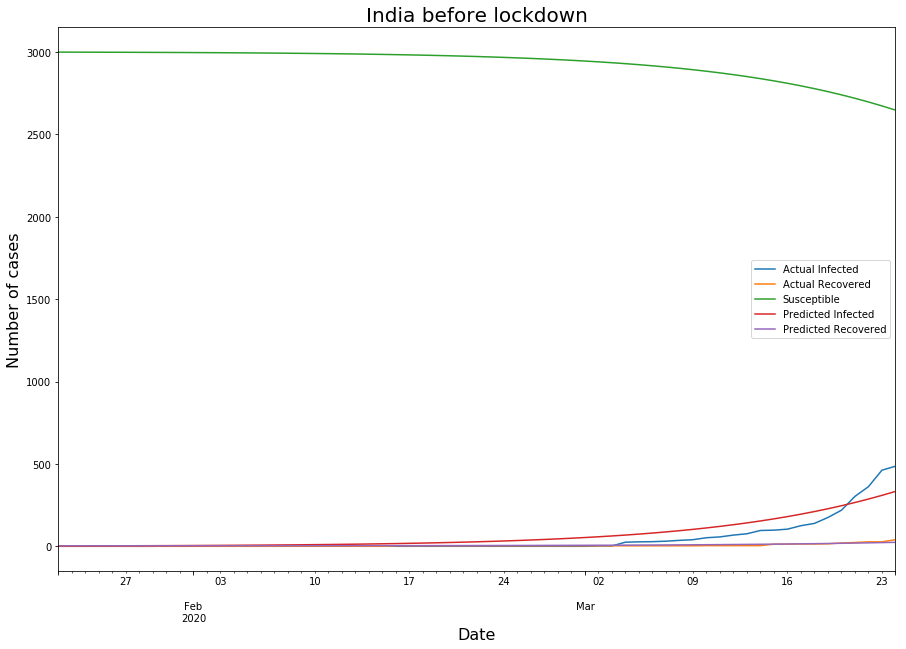

In [0]:
pre_ld = model()
pre_ld.train(recovered_pre_ld, infected_pre_ld, data_pre_ld,
          s_0_pre_ld  , i_0_pre_ld , r_0_pre_ld
            , title = "India before lockdown" ) 

country=India, beta=0.08851559, gamma=0.00512762, r_0:17.26249970


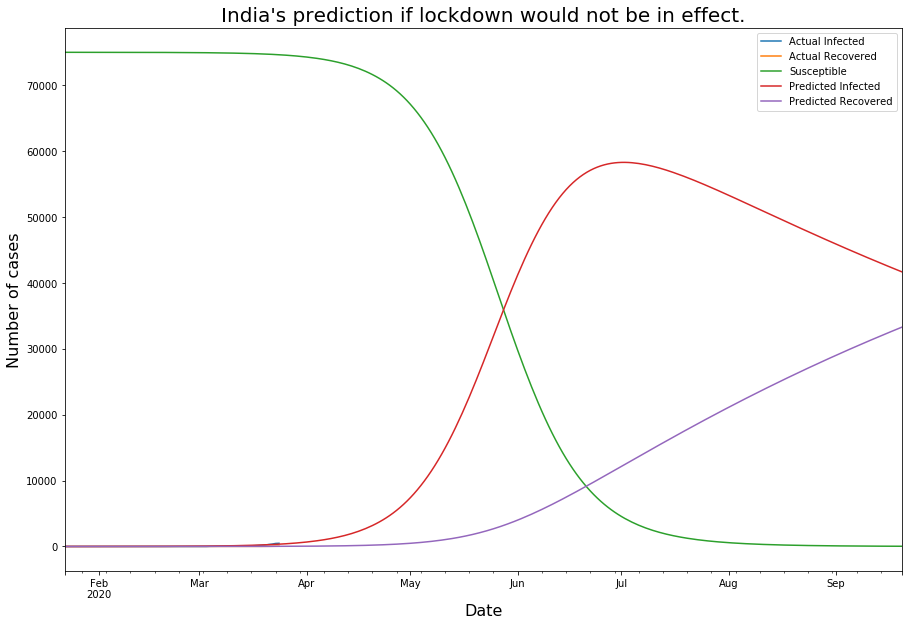

In [0]:
s_0_fp_pre_ld = 75000
i_0_fp_pre_ld = 2
r_0_fp_pre_ld = 3

fp_pre_ld = model(1,pre_pres_fut)
fp_pre_ld.train(recovered_pre_ld, infected_pre_ld, data_pre_ld,
          s_0_fp_pre_ld  , i_0_fp_pre_ld , r_0_fp_pre_ld
            , title = "India's prediction if lockdown would not be in effect." ) 

country=India, beta=0.08849286, gamma=0.00512980, r_0:17.25073891


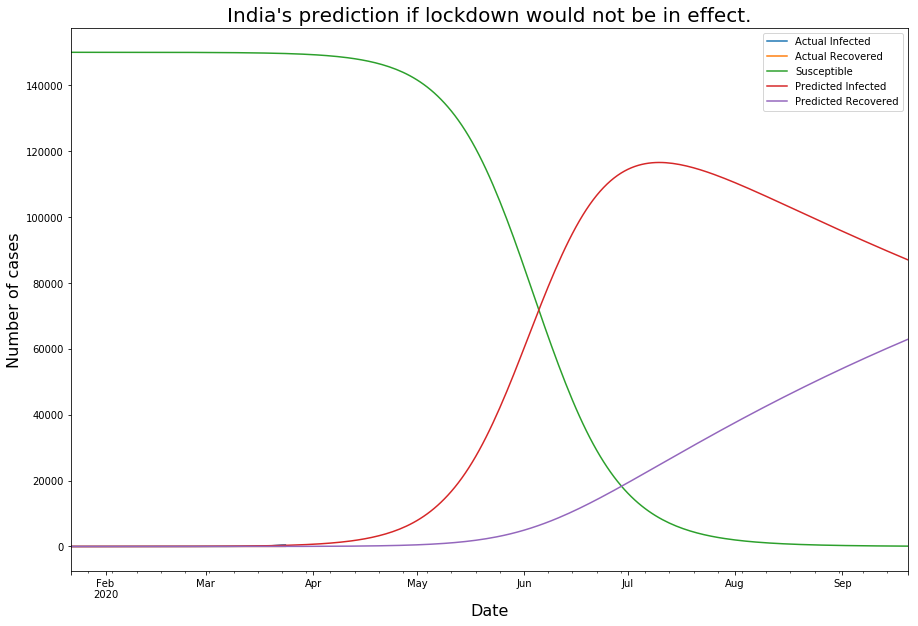

In [0]:
s_0_fp_pre_ld = 150000
i_0_fp_pre_ld = 2
r_0_fp_pre_ld = 3

fp_pre_ld = model(1,pre_pres_fut)
fp_pre_ld.train(recovered_pre_ld, infected_pre_ld, data_pre_ld,
          s_0_fp_pre_ld  , i_0_fp_pre_ld , r_0_fp_pre_ld
            , title = "India's prediction if lockdown would not be in effect." ) 

## POST - LOCKDOWN

In [0]:
ts_india_ld = ts_india[(ts_india['date']>='2020-3-25')].reset_index(drop=True)

In [0]:
data_ld = ts_india_ld.set_index('date')['active']
infected_ld = ts_india_ld.set_index('date')['confirmed']
recovered_ld = ts_india_ld.set_index('date')['recovered']
# removed_ld = ts_india_ld['recovered'] + ts_india_ld['deaths'] 

In [0]:
pandas_tslib = data_ld.index[-1].to_pydatetime() + timedelta(days=1)
pandas_tslib = pandas_tslib.strftime('%Y-%m-%d')
pres_fut = np.array(list(data_ld.index.values)+ list((np.array(pd.date_range(pandas_tslib, periods=180)))))

### Best case , only 75000 of the population is susciptable

In [0]:
s_0 = 75000
i_0 = ts_india_pre_ld['confirmed'].iloc[-1]
# r_0 = 50
r_0 = ts_india_pre_ld['recovered'].iloc[-1] + ts_india_pre_ld['deaths'].iloc[-1]

country=India, beta=0.16139075, gamma=0.03057925, r_0:5.27778579


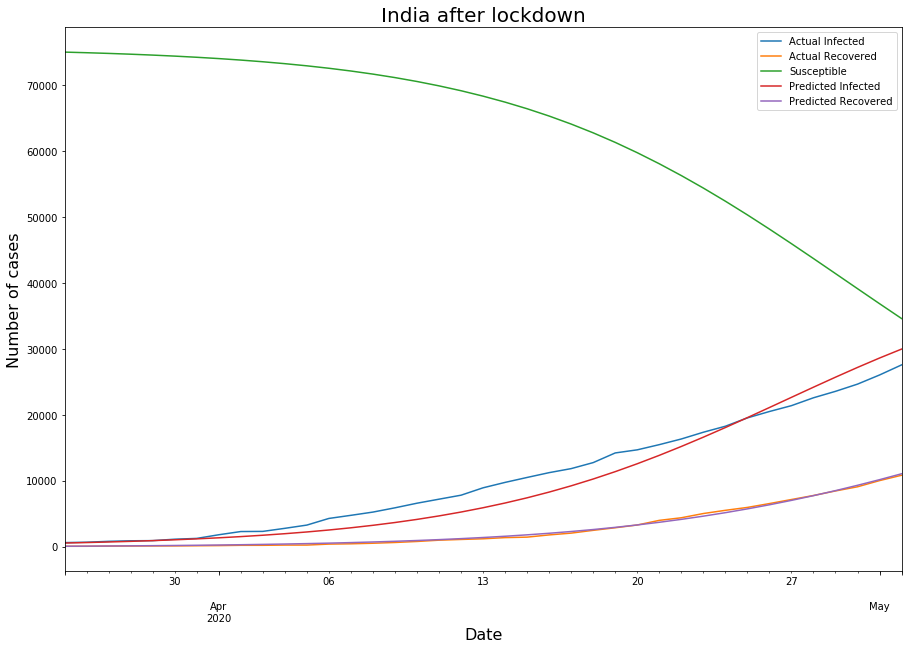

In [0]:
obj1 = model()
obj1.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0  ,"India after lockdown" ) 

#### Future prediction

country=India, beta=0.15311306, gamma=0.03464741, r_0:4.41917766


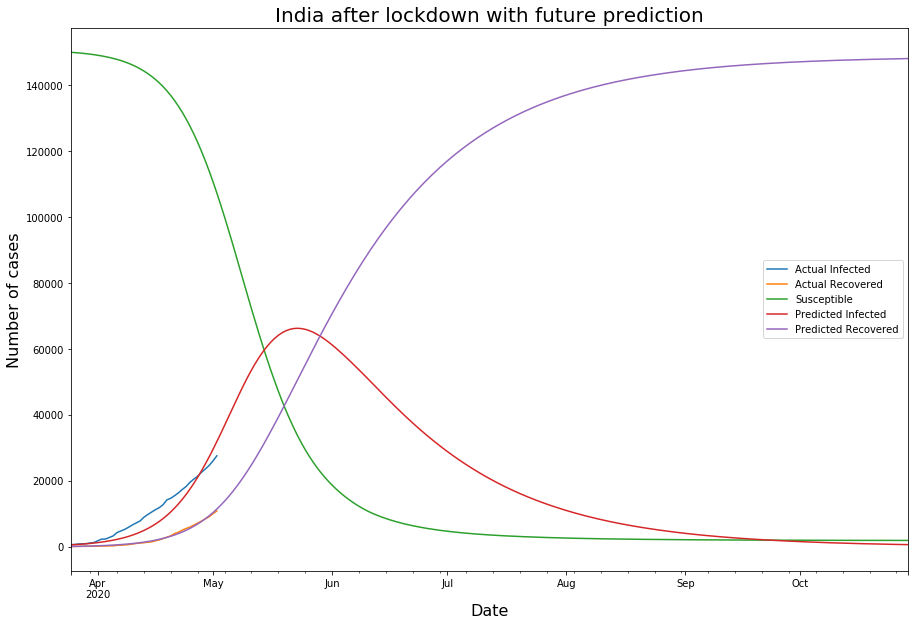

In [0]:
fp_post_ld = model(1 , pres_fut )
fp_post_ld.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0  ,"India after lockdown with future prediction" ) 

### Worst case ,  150000 of the population is susciptable

In [0]:
s_0 = 150000
i_0 = ts_india_pre_ld['confirmed'].iloc[-1]
r_0 =  ts_india_pre_ld['recovered'].iloc[-1] +  ts_india_pre_ld['deaths'].iloc[-1] 
# r_0 = ts_india_pre_ld['recovered'].iloc[-1] 

country=India, beta=0.15311306, gamma=0.03464741, r_0:4.41917766


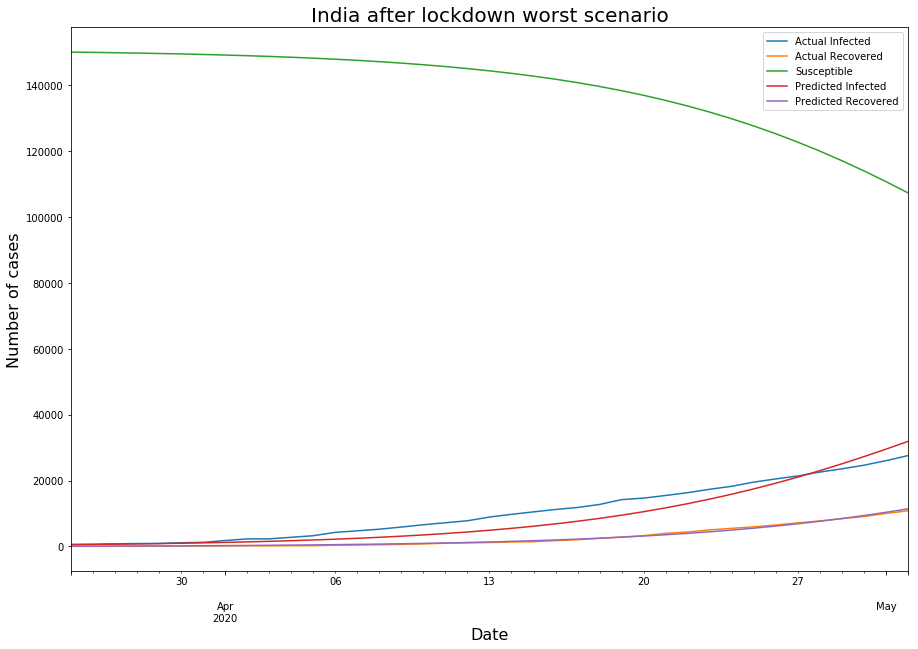

In [0]:
wc = model()
wc.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0 ,"India after lockdown worst scenario" ) 

# Future prediction

country=India, beta=0.15311306, gamma=0.03464741, r_0:4.41917766


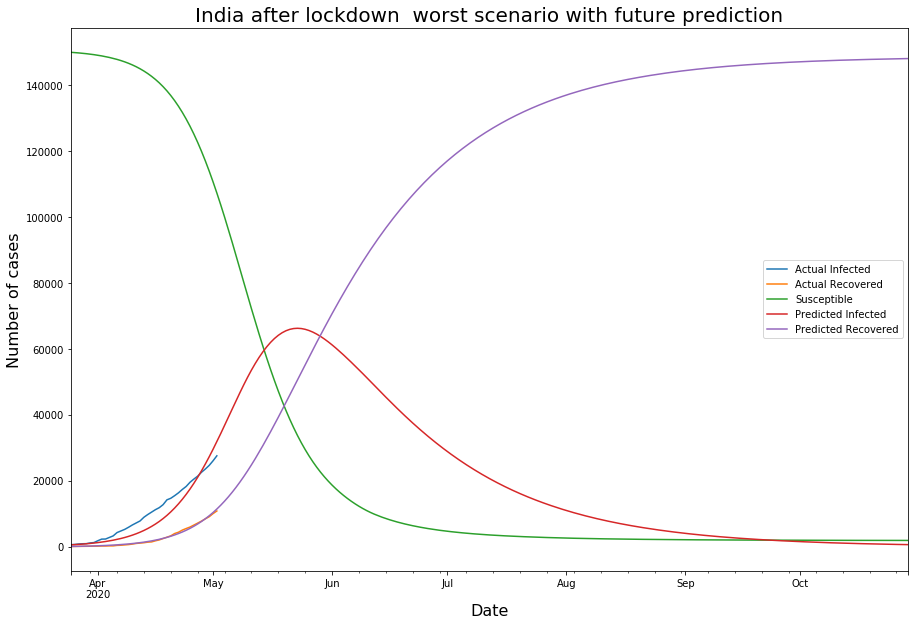

In [0]:
fp = model(1,pres_fut)
fp.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0  ,"India after lockdown  worst scenario with future prediction" ) 

## State-wise analysis of post- lockdown situation

### Common Functions

In [0]:
temp = mohfw()
statedict = temp.readData()

def prep_state_data(ts):
    ts_state = ts
    ts_state = ts_state.rename(columns={"cured": "recovered", "death": "deaths"})
    ts_state['date'] =  pd.to_datetime(ts_state['date'], infer_datetime_format=True)
    ts_state['active'] =  ts_state['confirmed'] - (ts_state['deaths'] + ts_state['recovered'])
    ts_state = ts_state.drop(["state"], axis=1)
    return ts_state

def choose_data_in_range(ts_state, choice):
    if choice=="pre":
        ts_state_data = ts_state[(ts_state['date']<'2020-3-25')].reset_index(drop=True)
    elif choice=="post":
        ts_state_data = ts_state[(ts_state['date']>='2020-3-25')].reset_index(drop=True)  
    data = ts_state_data.set_index('date')['active']
    infected = ts_state_data.set_index('date')['confirmed']
    recovered = ts_state_data.set_index('date')['recovered']
    return ts_state_data, data, infected, recovered

### Maharashtra Post-Lockdown

In [0]:
ts_state = prep_state_data(statedict["Maharashtra"])
ts_state_ld, data_ld, infected_ld, recovered_ld = choose_data_in_range(ts_state, "post")

In [0]:
pandas_tslib = data_ld.index[-1].to_pydatetime() + timedelta(days=1)
pandas_tslib = pandas_tslib.strftime('%Y-%m-%d')
pres_fut = np.array(list(data_ld.index.values)+ list((np.array(pd.date_range(pandas_tslib, periods=180)))))

beta=0.15700223, gamma=0.02208098, r_0:7.11029187


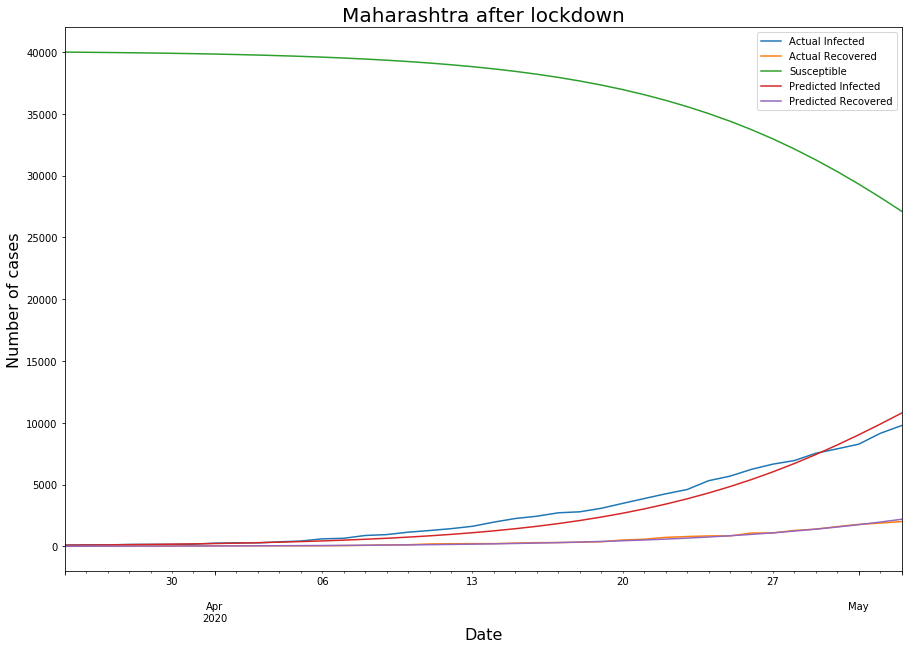

In [0]:
s_0 = 40000
i_0 = ts_state_pre_ld['confirmed'].iloc[-1]
r_0 = 5
obj1 = model()
obj1.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0  , "Maharashtra after lockdown") 

### Future prediction

beta=0.15700223, gamma=0.02208098, r_0:7.11029187


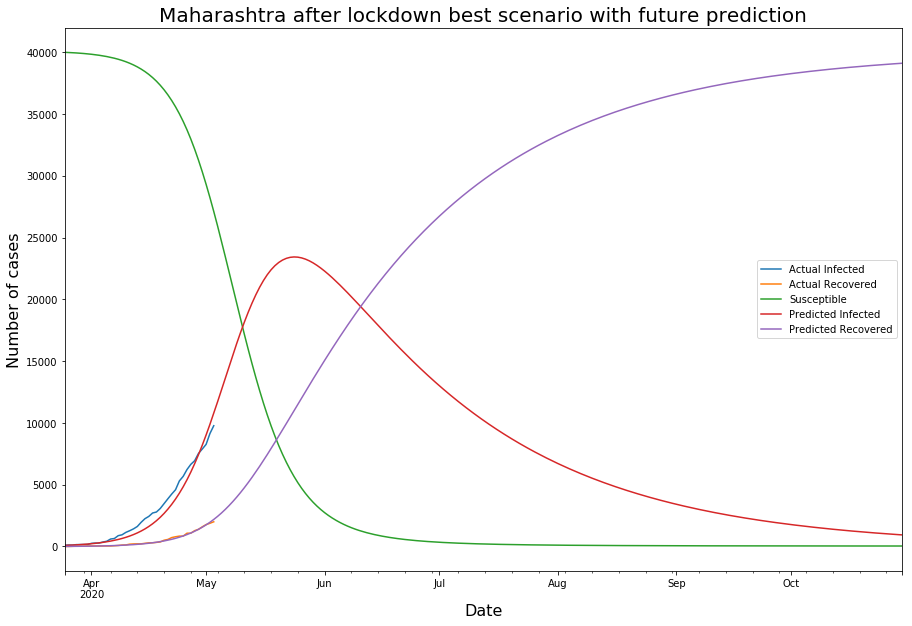

In [0]:
fp_post_ld = model(1 , pres_fut )
fp_post_ld.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0  ,"Maharashtra after lockdown best scenario with future prediction" ) 

### Analysis:
The R0 number before lockdown showed disturbing rise in the cases, but with lockdown, the R0 estimate seems to go down, even if not by a lot. More aggressive measures need to be imposed further. Maharashtra has the highest cases out of all the states in the country and contributes to about 1/3rd cases in India

### Gujarat Post-Lockdown

In [0]:
ts_state = prep_state_data(statedict["Gujarat"])
ts_state_ld, data_ld, infected_ld, recovered_ld = choose_data_in_range(ts_state, "post")

In [0]:
pandas_tslib = data_ld.index[-1].to_pydatetime() + timedelta(days=1)
pandas_tslib = pandas_tslib.strftime('%Y-%m-%d')
pres_fut = np.array(list(data_ld.index.values)+ list((np.array(pd.date_range(pandas_tslib, periods=180)))))

29 17
beta=0.15648831, gamma=0.01905875, r_0:8.21083928


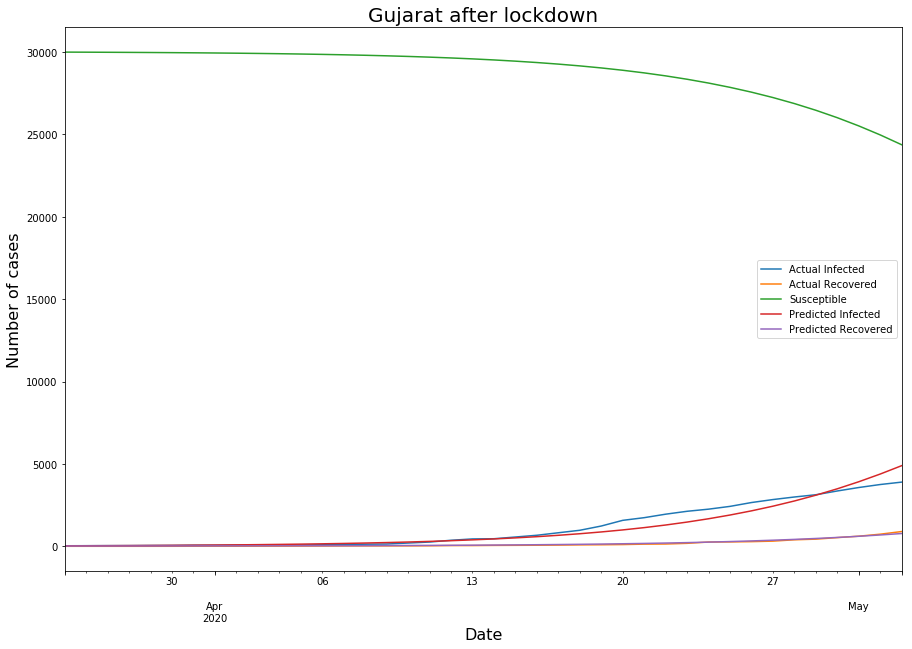

In [0]:
s_0 = 30000
i_0 = ts_state_pre_ld['confirmed'].iloc[-1]
# r_0 = ts_state_pre_ld['recovered'].iloc[-1]
r_0 = 17
print(i_0, r_0)
obj1 = model()
obj1.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0  , "Gujarat after lockdown") 

### Future prediction

beta=0.15648831, gamma=0.01905875, r_0:8.21083928


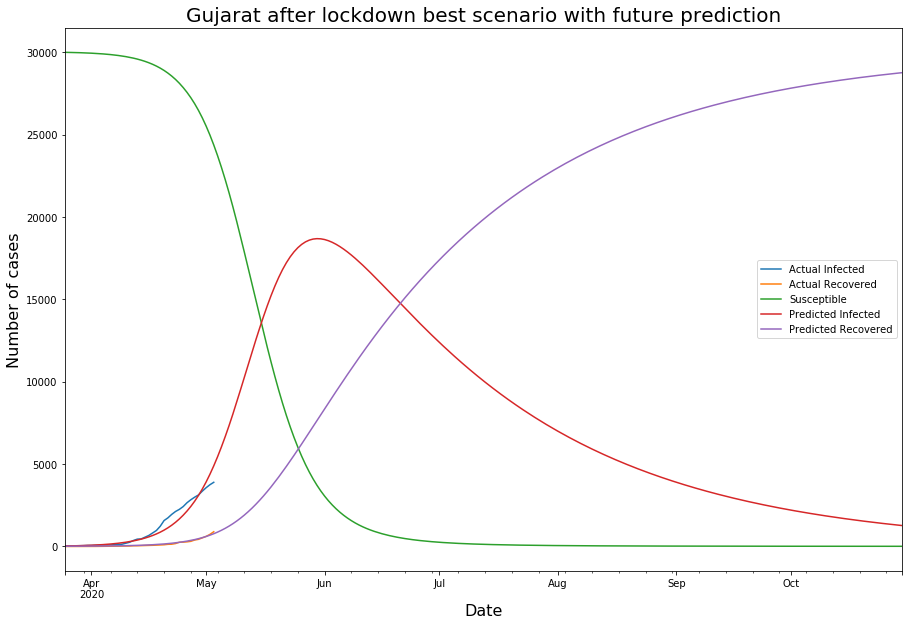

In [0]:
fp_post_ld = model(1 , pres_fut )
fp_post_ld.train(recovered_ld, infected_ld, data_ld, s_0 , i_0 , r_0  ,"Gujarat after lockdown best scenario with future prediction" ) 

### Analysis:
The R0 number before lockdown showed disturbing rise in the cases, but with lockdown, the R0 estimate seems to go down. More aggressive measures need to be imposed further. Gujarat has the second highest number of active cases among all the states in the country. Lockdown has 

# Data Visualization

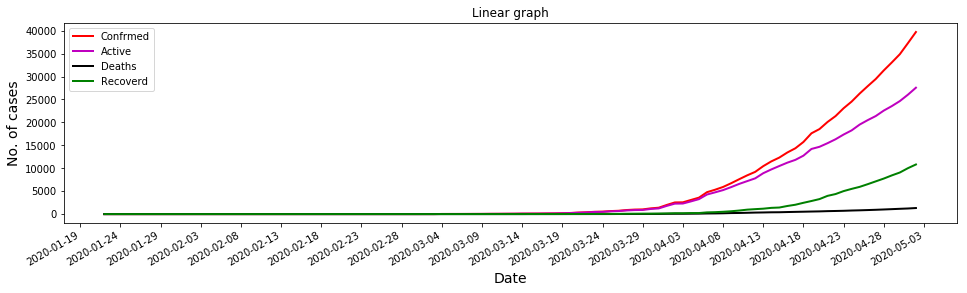

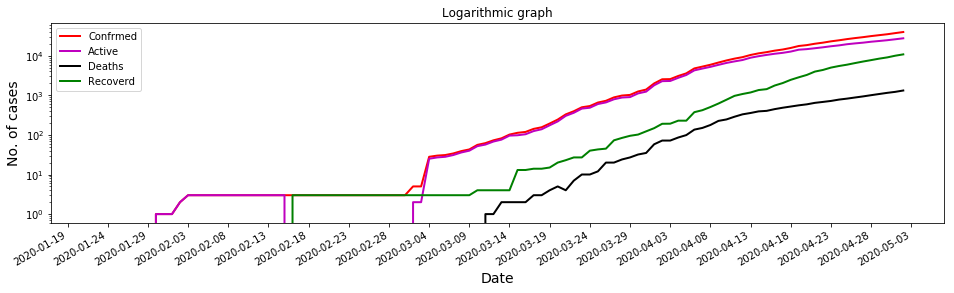

In [0]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(ts_india['date'],ts_india['confirmed'],'r',label = 'Confrmed' , linewidth = 2)
plt.plot(ts_india['date'],ts_india['active'],'m',label = 'Active' , linewidth = 2)
plt.plot(ts_india['date'],ts_india['deaths'],'k',label = 'Deaths' , linewidth = 2)
plt.plot(ts_india['date'],ts_india['recovered'],'g',label = 'Recoverd' , linewidth = 2)
plt.gcf().autofmt_xdate()
plt.title("Linear graph")
plt.ylabel("No. of cases",fontsize = 14)
plt.xlabel("Date",fontsize = 14)
plt.legend()
# plt.show()

plt.figure(figsize=(16,9))
plt.subplot(212)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(ts_india['date'],ts_india['confirmed'],'r',label = 'Confrmed' , linewidth = 2)
plt.plot(ts_india['date'],ts_india['active'],'m',label = 'Active' , linewidth = 2)
plt.plot(ts_india['date'],ts_india['deaths'],'k',label = 'Deaths' , linewidth = 2)
plt.plot(ts_india['date'],ts_india['recovered'],'g',label = 'Recoverd' , linewidth = 2)
plt.yscale("log")
plt.gcf().autofmt_xdate()
plt.title("Logarithmic graph")
plt.ylabel("No. of cases",fontsize = 14)
plt.xlabel("Date",fontsize = 14)
plt.legend()
# plt.savefig("Present_scenario"+'.png')

plt.show()


# Data Visualization for USA 

In [0]:
ts_us = ts.readData("US")
ts_us['date'] =  pd.to_datetime(ts_us['date'], infer_datetime_format=True)
ts_us['active'] =  ts_us['confirmed'] - (ts_us['deaths'] + ts_us['recovered'])

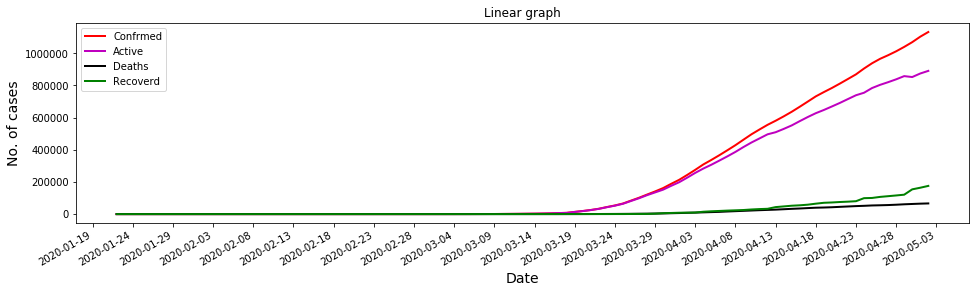

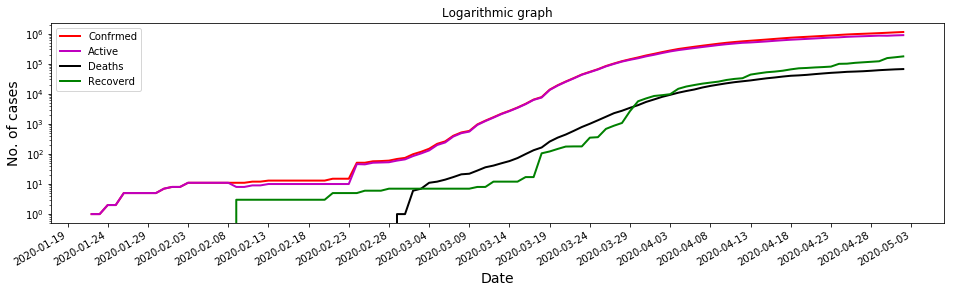

In [0]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(ts_us['date'],ts_us['confirmed'],'r',label = 'Confrmed' , linewidth = 2)
plt.plot(ts_us['date'],ts_us['active'],'m',label = 'Active' , linewidth = 2)
plt.plot(ts_us['date'],ts_us['deaths'],'k',label = 'Deaths' , linewidth = 2)
plt.plot(ts_us['date'],ts_us['recovered'],'g',label = 'Recoverd' , linewidth = 2)
plt.gcf().autofmt_xdate()
plt.title("Linear graph")
plt.ylabel("No. of cases",fontsize = 14)
plt.xlabel("Date",fontsize = 14)
plt.legend()
# plt.show()

plt.figure(figsize=(16,9))
plt.subplot(212)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(ts_us['date'],ts_us['confirmed'],'r',label = 'Confrmed' , linewidth = 2)
plt.plot(ts_us['date'],ts_us['active'],'m',label = 'Active' , linewidth = 2)
plt.plot(ts_us['date'],ts_us['deaths'],'k',label = 'Deaths' , linewidth = 2)
plt.plot(ts_us['date'],ts_us['recovered'],'g',label = 'Recoverd' , linewidth = 2)
plt.yscale("log")
plt.gcf().autofmt_xdate()
plt.title("Logarithmic graph")
plt.ylabel("No. of cases",fontsize = 14)
plt.xlabel("Date",fontsize = 14)
plt.legend()
# plt.savefig("Present_scenario"+'.png')

plt.show()


### Now we will compare India(followed strict Lockdown) vs USA (didn't follow lockdown for a long time)

In [0]:
obj = countryWise()
df_india = obj.getIndiaData()
df_usa = obj.getUSdata()
df_india['date'] =  pd.to_datetime(df_india['date'], infer_datetime_format=True)
df_usa['date'] =  pd.to_datetime(df_usa['date'], infer_datetime_format=True)


In [0]:
df_usa['total_tests'] = pd.to_numeric(df_usa['total_tests'])
df_india['total_tests'] = pd.to_numeric(df_india['total_tests'])

In [0]:
df_india.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,recovered
6375,2020-01-22,0,0,0,0,0.0,0.0
6376,2020-01-23,0,0,0,0,0.0,0.0
6377,2020-01-24,0,0,0,0,0.0,0.0
6378,2020-01-25,0,0,0,0,0.0,0.0
6379,2020-01-26,0,0,0,0,0.0,0.0


In [0]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 14007 to 14108
Data columns (total 7 columns):
date            102 non-null datetime64[ns]
total_cases     102 non-null int64
new_cases       102 non-null int64
total_deaths    102 non-null int64
new_deaths      102 non-null int64
total_tests     102 non-null float64
recovered       102 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 6.4 KB


**Testing in the two countries varied hugely**.
* USA tested a lot more persons than India hence accounting to a huge number of confirmed cases.

In [0]:
def confirmed_per_tested(df):
    temp =[]
    for i in range(df.shape[0]):
        if df['total_tests'].iloc[i] > 0 :
            temp.append(df['total_cases'].iloc[i] / df['total_tests'].iloc[i])
        else:
            temp.append(0.0)
    #     print(temp[-1] , df['total_tests'].iloc[i])
    df['confirmed_per_tested'] = temp
    return df
    

In [0]:
df_usa = confirmed_per_tested(df_usa)
df_usa.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,recovered,confirmed_per_tested
14104,2020-04-28,988451,22541,56245,1369,5795728.0,115936.0,0.170548
14105,2020-04-29,1012583,24132,58355,2110,6026170.0,120720.0,0.168031
14106,2020-04-30,1039909,27326,60966,2611,6246692.0,153947.0,0.166474
14107,2020-05-01,1069826,29917,63006,2040,6551810.0,164015.0,0.163287
14108,2020-05-02,1103781,33955,65068,2062,6800000.0,175382.0,0.162321


In [0]:
df_india = confirmed_per_tested(df_india)
df_india.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,recovered,confirmed_per_tested
6471,2020-04-28,29435,1543,934,62,716733.0,7747.0,0.041068
6472,2020-04-29,31332,1897,1007,73,770764.0,8437.0,0.040651
6473,2020-04-30,33050,1718,1074,67,830201.0,9068.0,0.039810
6474,2020-05-01,35043,1993,1147,73,902654.0,10007.0,0.038822
6475,2020-05-02,37336,2293,1218,71,976363.0,10819.0,0.038240


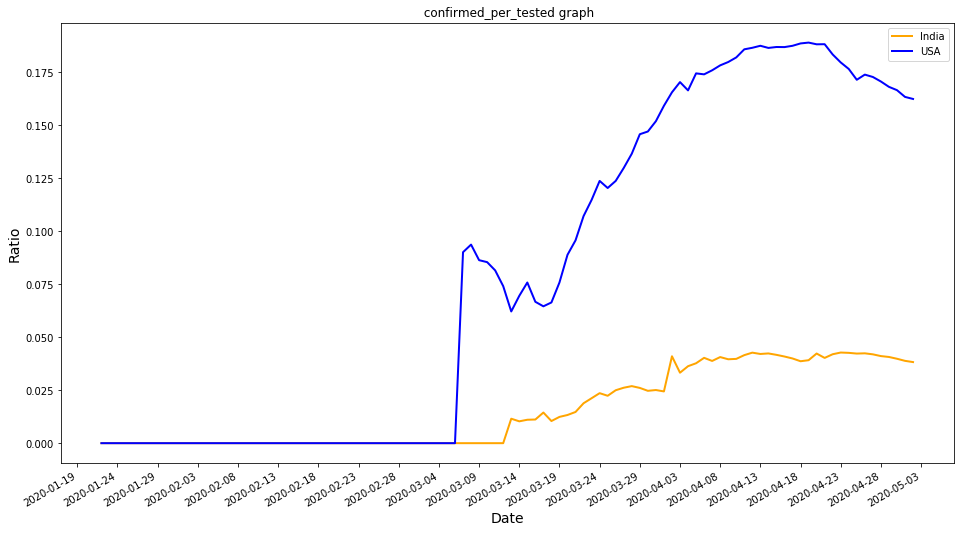

In [0]:
plt.figure(figsize=(16,9))
plt.subplot(111)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(df_india['date'],df_india['confirmed_per_tested'],color = 'orange',label = 'India' , linewidth = 2)
plt.plot(df_usa['date'],df_usa['confirmed_per_tested'],'b',label = 'USA' , linewidth = 2)
# plt.yscale("log")
plt.gcf().autofmt_xdate()
plt.title(" confirmed_per_tested graph")
plt.ylabel("Ratio",fontsize = 14)
plt.xlabel("Date",fontsize = 14)
plt.legend()
plt.savefig("cmpr.png")

# Comparing R_0 value between India and USA

In [0]:
ts_usa = ts.readData("US")
ts_usa['date'] =  pd.to_datetime(ts_usa['date'], infer_datetime_format=True)
ts_usa['active'] =  ts_usa['confirmed'] - (ts_usa['deaths'] + ts_usa['recovered'])

In [0]:
ts_usa.head()

,date,confirmed,deaths,recovered,active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5


In [0]:
us_data_cmp = ts_usa.set_index('date')['active']
us_infected_cmp = ts_usa.set_index('date')['confirmed']
us_recovered_cmp = ts_usa.set_index('date')['recovered']
# removed_ld = ts_india_ld['recovered'] + ts_india_ld['deaths'] 

In [0]:
s_0 = 1000000
i_0 = 20
# r_0 = 50
r_0 = 200

country=India, beta=0.14226196, gamma=0.00763724, r_0:18.62740573


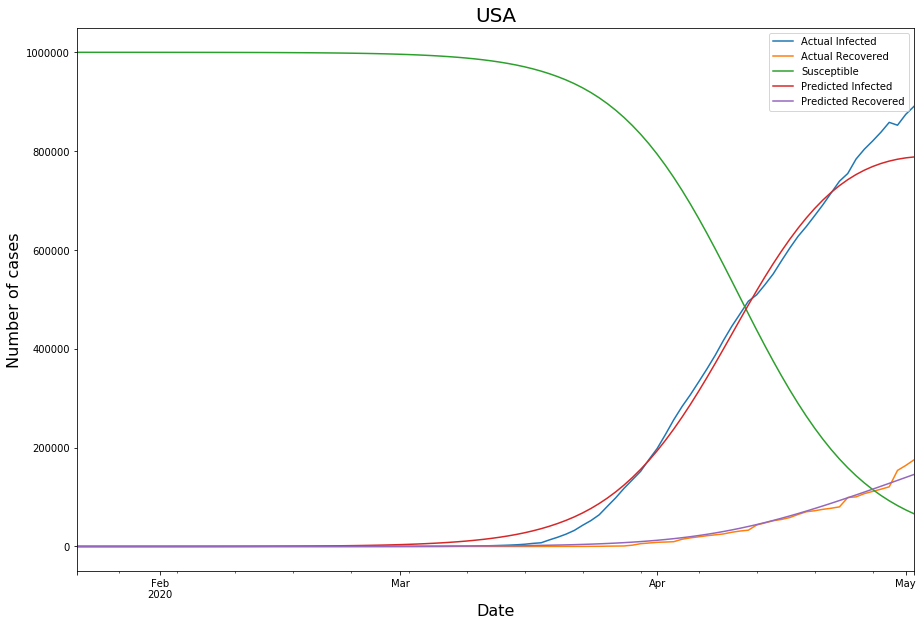

In [0]:
cmp = model()
cmp.train(us_recovered_cmp, us_infected_cmp, us_data_cmp, s_0 , i_0 , r_0  ,"USA" ) 

In [0]:
ind_data_cmp = ts_india.set_index('date')['active']
ind_infected_cmp = ts_india.set_index('date')['confirmed']
ind_recovered_cmp = ts_india.set_index('date')['recovered']
# removed_ld = ts_india_ld['recovered'] + ts_india_ld['deaths'] 

In [0]:
# pandas_tslib = data_ld.index[-1].to_pydatetime() + timedelta(days=1)
# pandas_tslib = pandas_tslib.strftime('%Y-%m-%d')
# pres_fut = np.array(list(data_ld.index.values)+ list((np.array(pd.date_range(pandas_tslib, periods=180)))))

In [0]:
s_0 = 75000
i_0 = 2
# r_0 = 50
r_0 = 50

country=India, beta=0.12710378, gamma=0.02383713, r_0:5.33217570


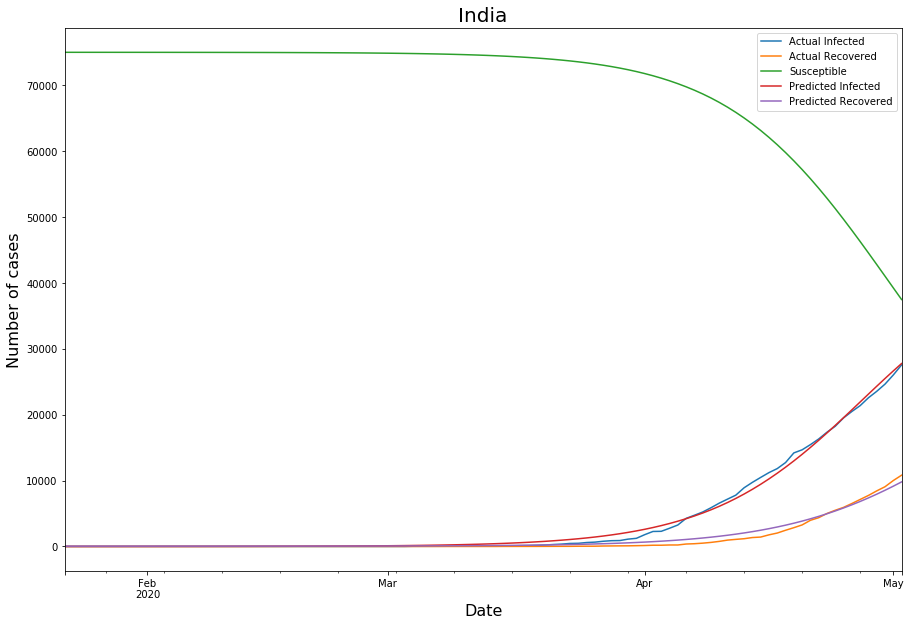

In [0]:
cmp1 = model()
cmp1.train(ind_recovered_cmp, ind_infected_cmp, ind_data_cmp, s_0 , i_0 , r_0  ,"India" ) 

In [ ]:
import plotly.express  as px
import pandas as pd
# TREE MAP
labs = pd.read_csv("ICMRTestingLabs.csv")
fig = px.treemap(labs, path=['state','city'],
                  color='city', hover_data=['lab','address'],
                  color_continuous_scale='reds')
fig.show()